In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

## 整理資料

In [4]:
class_names = ['T-shirt/top','Trouser','Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Text(0.5, 1.0, 'Dress')

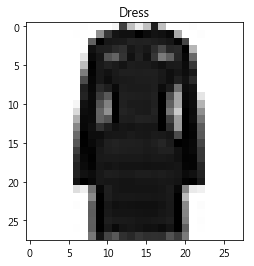

In [5]:
plt.imshow(x_train[500],cmap = "Greys")
plt.title(class_names[y_train[500]])

In [6]:
x_train = x_train.reshape(60000,28,28,1)/255
x_test = x_test.reshape(10000,28,28,1)/255

In [7]:
x_train.shape

(60000, 28, 28, 1)

In [8]:
from tensorflow.keras.utils import to_categorical

In [9]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## Build CNN

In [10]:
import tensorflow as tf
from tensorflow.keras import models,layers,optimizers

In [11]:
from tensorflow.keras.optimizers import SGD,Adam

In [12]:
model = models.Sequential()

In [13]:
#channel = 64
model.add(layers.Conv2D(64,(3,3), padding = 'same', input_shape = (28,28,1), activation = 'relu'))

In [14]:
model.add(layers.MaxPooling2D(pool_size = (2,2)))

In [15]:
model.add(layers.Conv2D(128,(3,3), padding = 'same', activation = 'relu'))

In [16]:
model.add(layers.MaxPooling2D(pool_size = (2,2)))

In [17]:
model.add(layers.Conv2D(256, (3,3), padding = 'same', activation = 'relu'))

In [18]:
model.add(layers.MaxPooling2D(pool_size = (2,2)))

In [19]:
model.add(layers.Flatten())

In [20]:
#300個神經元
model.add(layers.Dense(300,activation="relu"))

In [21]:
model.add(layers.Dense(10,activation="softmax"))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 256)         295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 256)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0

In [23]:
# 驗算
(3*3+1)*64

640

In [24]:
(3*3*64+1)*128

73856

In [25]:
model.compile(loss = 'mse', optimizer = SGD(lr = 0.087), metrics = ['accuracy'])

In [27]:
model.fit(x_train,y_train,batch_size=100 ,epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 168s 3ms/sample - loss: 0.0307 - accuracy: 0.7844
Epoch 2/10
60000/60000 [==============================] - 169s 3ms/sample - loss: 0.0290 - accuracy: 0.7979
Epoch 3/10
60000/60000 [==============================] - 169s 3ms/sample - loss: 0.0275 - accuracy: 0.8082
Epoch 4/10
60000/60000 [==============================] - 168s 3ms/sample - loss: 0.0264 - accuracy: 0.8167
Epoch 5/10
60000/60000 [==============================] - 168s 3ms/sample - loss: 0.0253 - accuracy: 0.8266
Epoch 6/10
60000/60000 [==============================] - 170s 3ms/sample - loss: 0.0244 - accuracy: 0.8319
Epoch 7/10
60000/60000 [==============================] - 171s 3ms/sample - loss: 0.0234 - accuracy: 0.8389
Epoch 8/10
60000/60000 [==============================] - 168s 3ms/sample - loss: 0.0227 - accuracy: 0.8442
Epoch 9/10
60000/60000 [==============================] - 168s 3ms/sample - loss: 0.0222 - accuracy: 0.8475
Epoch

In [28]:
result = model.predict_classes(x_test)

In [46]:
def my_predict(n):
    print('CNN Predicts', class_names[result[n]])
    X = x_test[n].reshape(28,28)
    plt.title(class_names[result[n]])
    plt.imshow(X, cmap = 'Greys')

CNN Predicts Bag


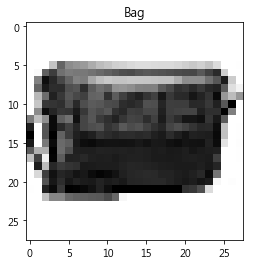

In [47]:
my_predict(56)

In [48]:
from ipywidgets import interact

In [49]:
interact(my_predict, n = (0,9999))

interactive(children=(IntSlider(value=4999, description='n', max=9999), Output()), _dom_classes=('widget-inter…

<function __main__.my_predict(n)>

In [50]:
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 12s 1ms/sample - loss: 0.0234 - accuracy: 0.8388


In [51]:
loss, acc = score

In [53]:
print('Test data accuracy is', acc)

Test data accuracy is 0.8388


### 把我們的 model 存起來

In [55]:
model.save('myCNNmodelforfasion.h5')